### 画出KNN的决策边界
针对于不同的K，画出不同的决策边界。
最后的输出图，请参考最下方的。 请参考 meshgrid 函数的使用https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

(200, 2) (200,)


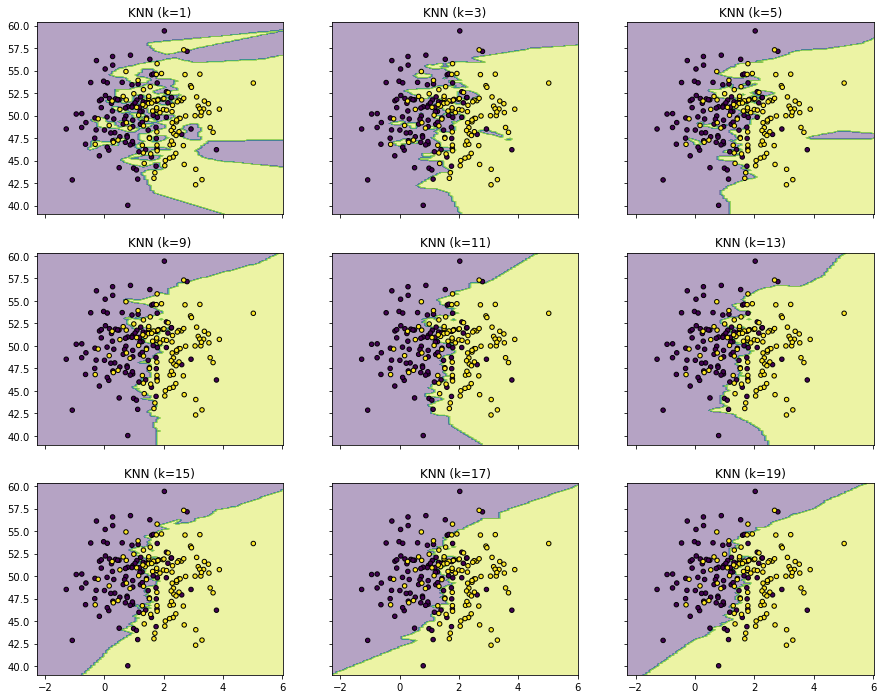

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# 生成一些随机样本，n_points为所要生成的样本数量
n_points = 100

# 生成数据X1和X2分别代表两类数据，并将X1和X2进行拼接，将X1标签设置为0，X2标签设置为1
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print (X.shape, y.shape)


# KNN模型的训练过程
# clfs列表中存放不同K值的KNN模型
clfs = []

# neighbors列表中表示要生成的KNN模型的K值
neighbors = [1,3,5,9,11,13,15,17,19]

# 循环遍历所有的K值并生成对应K值的KNN模型
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

    
# 画出KNN的决策边界

# meshgrid就是把二维空间中所有的点都列出来，先找到数据中x，y的最小和最大值
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 将meshgrid列举出的所有点坐标传给xx和yy，分别对应x轴和y轴的坐标
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# 共需绘制九张图对应九个不同K值的KNN模型
# sharex和sharey表示坐标轴的属性是否相同，可选的参数：True，False，row，col，默认值均为False，表示画布中的四个ax是相互独立的
# 有关sharex和sharey参考https://www.cnblogs.com/zhouzhe-blog/p/9614761.html
f, axarr = plt.subplots(3, 3, sharex= 'col', sharey= 'row', figsize=(15,12))

# 通过循环绘制对应位置的九个模型决策边界图
for idx,clf,tt in zip(product([0,1,2], [0,1,2]), clfs, ['KNN (k=%d)' %k for k in neighbors]):
    
    # 通过模型计算预测值
    # np.c_按列连接两个矩阵
    # ravel()方法将数组维度拉成一维数组
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # idx中数据对应坐标画图
    # contour:等高线中的线
    # contourf:等高线之间的区域
    axarr[idx[0],idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolors= 'k')
    axarr[idx[0],idx[1]].set_title(tt)
    
plt.show()

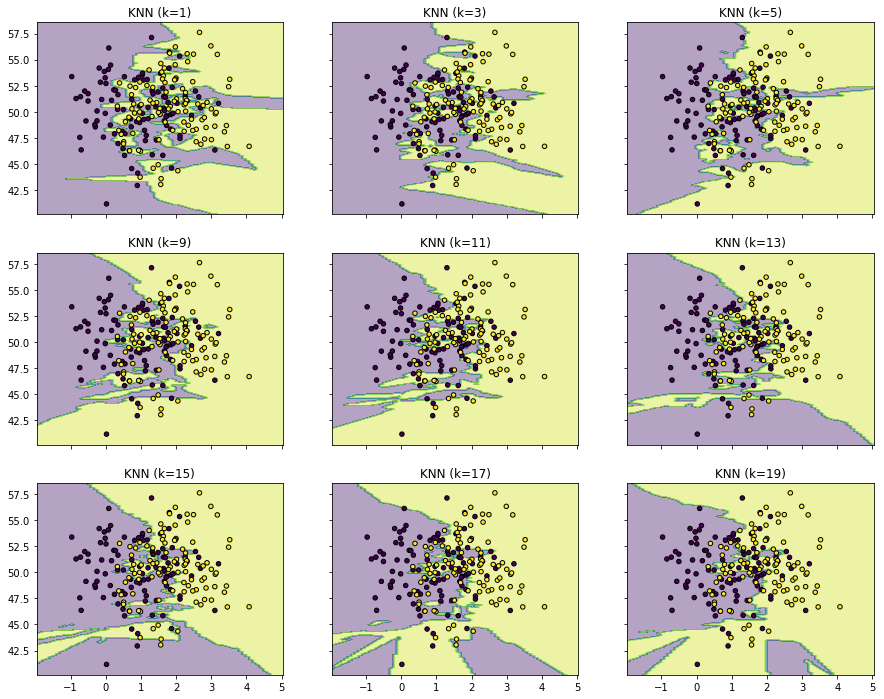